In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn

In [2]:
df = pd.read_csv('sfa1314.csv')
hd = pd.read_csv('hd2014.csv', encoding='CP437') #ISO-8859-1

In [3]:
df.head()

,UNITID,XSCUGRAD,SCUGRAD,XSCUGFFN,SCUGFFN,XSCUGFFP,SCUGFFP,XSCFA2,SCFA2,XSCFA1N,...,XNPT410,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450
0,100654,R,4051,R,1066,R,26,R,4051.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
1,100663,R,11542,R,1732,R,15,R,11542.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
2,100690,R,322,R,3,R,1,R,322.0,R,...,R,6332.0,R,8364.0,A,NaN,A,NaN,A,NaN
3,100706,R,5696,R,638,R,11,R,5696.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
4,100724,R,5356,R,1520,R,28,R,5356.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN


In [4]:
hd.head()

,UNITID,INSTNM,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,...,F1SYSTYP,F1SYSNAM,F1SYSCOD,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100636,Community College of the Air Force,100 S Turner Blvd,Montgomery,AL,36114-3011,1,0,Michael Artelli,Commandant,...,-1,,-1,1101,Montgomery,102,-86.244548,32.406138,-1,-1
1,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",President,...,2,,-2,1089,Madison,105,-86.568502,34.783368,131,1
2,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,President,...,1,The University of Alabama System,101050,1073,Jefferson,107,-86.809170,33.502230,119,1
3,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael Turner,President,...,2,,-2,1101,Montgomery,102,-86.174010,32.362609,232,2
4,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Robert A. Altenkirch,President,...,1,The University of Alabama System,101050,1089,Madison,105,-86.638420,34.722818,119,2


In [5]:
df[['PGRNT_P']].head()

,PGRNT_P
0,80.0
1,34.0
2,100.0
3,25.0
4,71.0


In [6]:
m = pd.merge(df, hd, left_on='UNITID', right_on='UNITID')

In [7]:
m = m[['UNITID','INSTNM','PGRNT_P','STABBR','INSTSIZE']].sort_values('PGRNT_P')

In [8]:
m = m[(m.STABBR == 'MN') | (m.STABBR == 'IA')]

In [9]:
m = m[(m.INSTSIZE == 2)]

In [10]:
test = m['PGRNT_P'].tolist()

In [11]:
m.head()

,UNITID,INSTNM,PGRNT_P,STABBR,INSTSIZE
1862,174844,St Olaf College,14.0,MN,2
1801,173258,Carleton College,14.0,MN,2
1822,173902,Macalester College,16.0,MN,2
1232,153834,Luther College,21.0,IA,2
1860,174792,Saint Johns University,22.0,MN,2


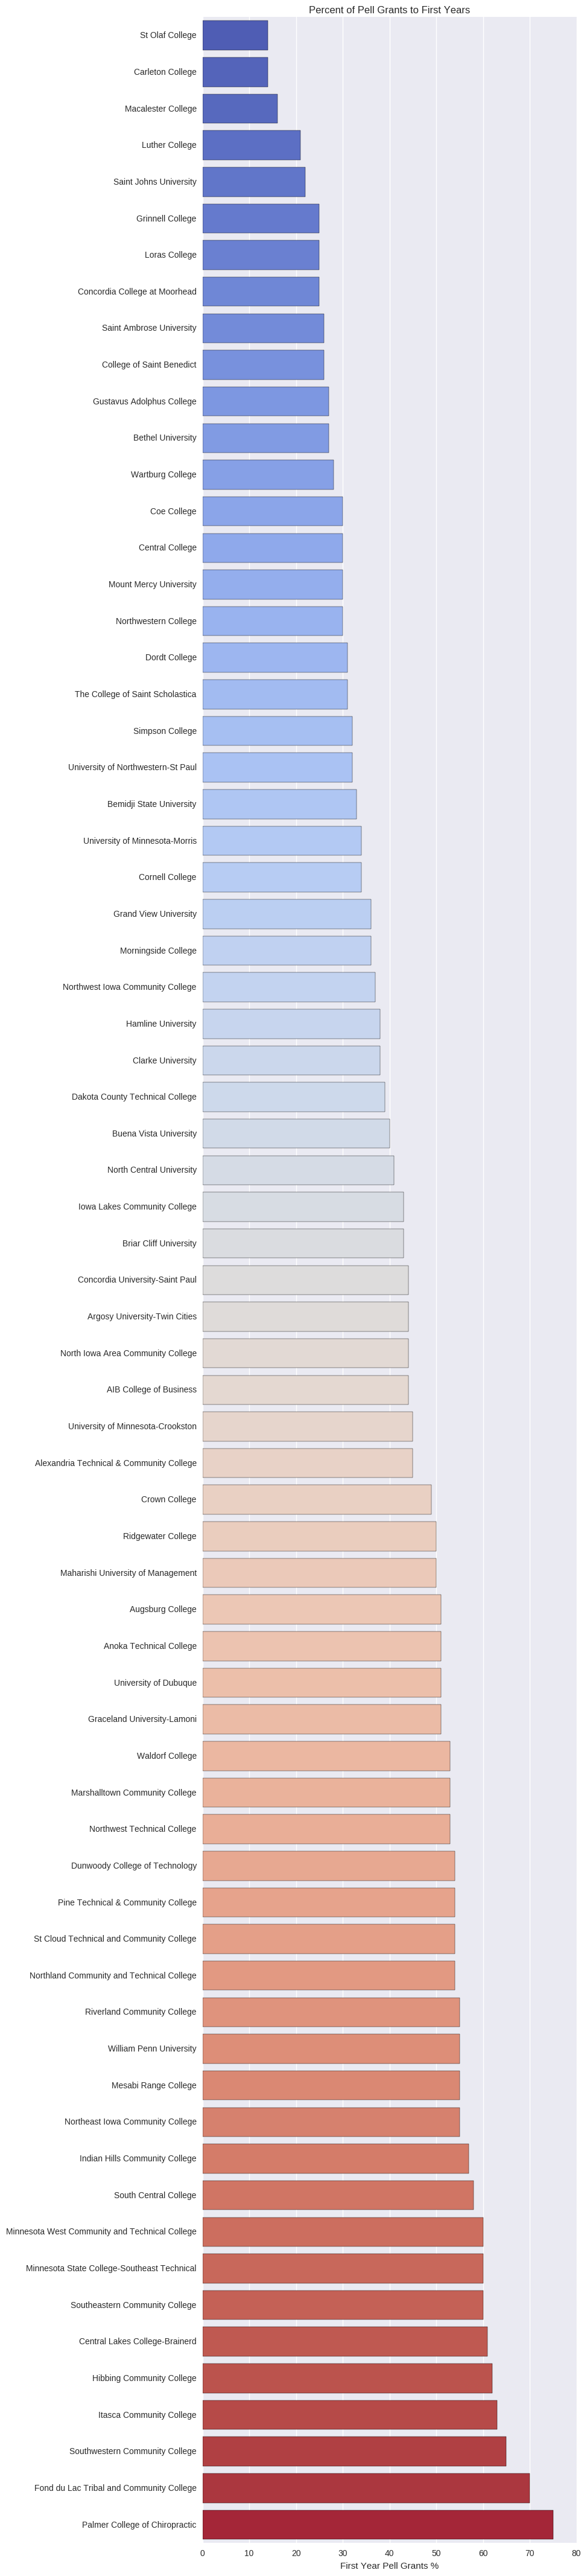

In [12]:
f, ax = matplotlib.pyplot.subplots(figsize=(8, 54))
sbn.barplot(x=m['PGRNT_P'], y=m['INSTNM'], palette=sbn.color_palette("coolwarm", len(test)), ax=ax)

texts = ax.set(ylabel="", xlabel="First Year Pell Grants %", title="Percent of Pell Grants to First Years")

In [13]:
data = pd.merge(df, hd, left_on='UNITID', right_on='UNITID')

In [14]:
luth = df[(df.UNITID == 153834)]
luth.head()  
#luth.pivot('UNITID'), columns='GRTYPE', values='GRTOTLT'

,UNITID,XSCUGRAD,SCUGRAD,XSCUGFFN,SCUGFFN,XSCUGFFP,SCUGFFP,XSCFA2,SCFA2,XSCFA1N,...,XNPT410,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450
1232,153834,R,2466,R,627,R,25,R,2466.0,R,...,R,17248.0,R,19139.0,R,20986.0,R,25123.0,R,28410.0
